In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [243]:
df=pd.read_csv('housepredicion.csv')

In [245]:
df.head(5)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [144]:
df.tail(5)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN
2918,2918,60,RL,9627,Inside,1Fam,5,1993,1994,HdBoard,0.0,996.0,NaN


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [148]:
object_cols = df.select_dtypes(include='object')
value_counts = {col: object_cols[col].value_counts() for col in object_cols}
value_counts

{'MSZoning': MSZoning
 RL         2265
 RM          460
 FV          139
 RH           26
 C (all)      25
 Name: count, dtype: int64,
 'LotConfig': LotConfig
 Inside     2133
 Corner      511
 CulDSac     176
 FR2          85
 FR3          14
 Name: count, dtype: int64,
 'BldgType': BldgType
 1Fam      2425
 TwnhsE     227
 Duplex     109
 Twnhs       96
 2fmCon      62
 Name: count, dtype: int64,
 'Exterior1st': Exterior1st
 VinylSd    1025
 MetalSd     450
 HdBoard     442
 Wd Sdng     411
 Plywood     221
 CemntBd     126
 BrkFace      87
 WdShing      56
 AsbShng      44
 Stucco       43
 BrkComm       6
 AsphShn       2
 Stone         2
 CBlock        2
 ImStucc       1
 Name: count, dtype: int64}

In [150]:
df.shape

(2919, 13)

In [152]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [154]:
df.duplicated().sum()

0

In [156]:
df['Exterior1st'].value_counts().sum()

2918

In [158]:
df['Exterior1st'].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock', nan], dtype=object)

In [160]:
df['BsmtFinSF2'].value_counts()

BsmtFinSF2
0.0       2571
180.0        5
294.0        5
435.0        3
483.0        3
          ... 
600.0        1
211.0        1
1031.0       1
438.0        1
297.0        1
Name: count, Length: 272, dtype: int64

In [162]:
df['BsmtFinSF2'].dtypes

dtype('float64')

In [164]:
df.drop(columns=['Id'],inplace=True)

In [166]:
df.head(2)

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0


In [168]:
df['SalePrice'].isnull().sum()

1459

In [170]:
df['SalePrice'].mean()

180921.19589041095

In [172]:
df['SalePrice']=df['SalePrice'].replace(np.NaN,180921.19589041095)
df

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.00000
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.00000
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.00000
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.00000
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,180921.19589
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,180921.19589
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,180921.19589
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,180921.19589


In [174]:
df.isnull().sum()

MSSubClass      0
MSZoning        4
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     1
BsmtFinSF2      1
TotalBsmtSF     1
SalePrice       0
dtype: int64

In [176]:
df['SalePrice'].mean()

180921.19589041098

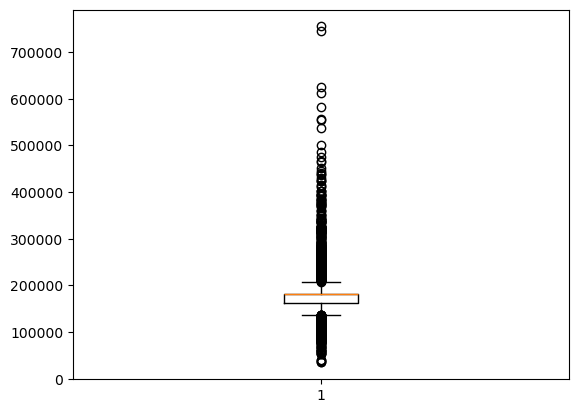

In [178]:
plt.boxplot(df['SalePrice'])
plt.show()

In [180]:
new = df.dropna()


In [182]:
new.isnull().sum()


MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

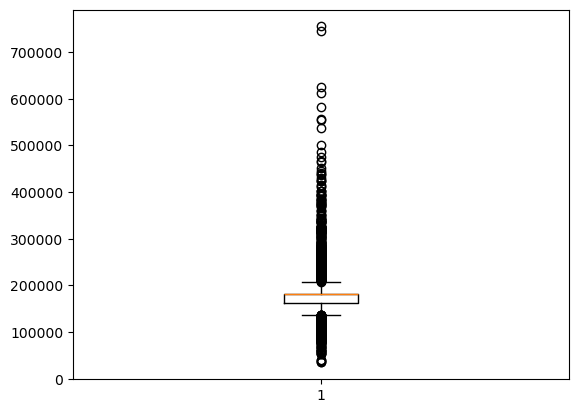

In [184]:
plt.boxplot(new['SalePrice'])
plt.show()

In [186]:
q1=new['SalePrice'].quantile(0.25)
q3=new['SalePrice'].quantile(0.75)
print(q1)
print(q3)

163000.0
180921.19589041095


In [188]:
iqr=q3-q1
iqr

17921.19589041095

In [190]:
min_range=q1-1.5*(iqr)
max_range=q3+1.5*(iqr)
print(min_range)
print(max_range)

136118.20616438356
207802.98972602736


In [193]:
new['SalePrice'].isnull().sum()

0

In [195]:
new.columns = new.columns.str.strip()


In [197]:
new.head(5)

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [199]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2913 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2913 non-null   int64  
 1   MSZoning      2913 non-null   object 
 2   LotArea       2913 non-null   int64  
 3   LotConfig     2913 non-null   object 
 4   BldgType      2913 non-null   object 
 5   OverallCond   2913 non-null   int64  
 6   YearBuilt     2913 non-null   int64  
 7   YearRemodAdd  2913 non-null   int64  
 8   Exterior1st   2913 non-null   object 
 9   BsmtFinSF2    2913 non-null   float64
 10  TotalBsmtSF   2913 non-null   float64
 11  SalePrice     2913 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 295.9+ KB


In [247]:
from sklearn.preprocessing import OneHotEncoder

In [249]:
oh = OneHotEncoder(sparse_output=True, drop='first')

In [251]:
# la.fit(new[['MSZoning','LotConfig','BldgType','Exterior1st']])
oh.fit_transform(new[['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']]).toarray()

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [255]:
# new['MSZoning','LotConfig','BldgType','Exterior1st']=la.transform(new[['MSZoning','LotConfig','BldgType','Exterior1st']])

feature_array=oh.fit_transform(new[['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']]).toarray()
oh.categories_

[array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object),
 array(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype=object),
 array(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], dtype=object),
 array(['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd',
        'HdBoard', 'ImStucc', 'MetalSd', 'Plywood', 'Stone', 'Stucco',
        'VinylSd', 'Wd Sdng', 'WdShing'], dtype=object)]

In [261]:
feature_labels=oh.categories_

In [272]:
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the data
encoded_data = encoder.fit_transform(new[['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']])

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']))

# Drop the original columns
new = new.drop(['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'], axis=1)

# Concatenate the encoded DataFrame with the original DataFrame
new_encoded = pd.concat([new, encoded_df], axis=1)

# Display the resulting DataFrame
print("Encoded DataFrame:\n", new_encoded.head())

# Decoding the encoded data back to original categories
decoded_data = encoder.inverse_transform(encoded_data)
decoded_df = pd.DataFrame(decoded_data, columns=['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'])

# Concatenate the decoded DataFrame with the remaining original columns
new_decoded = pd.concat([new[['OtherColumn']], decoded_df], axis=1)

# Display the resulting DataFrame
print("\nDecoded DataFrame:\n", new_decoded.head())

Encoded DataFrame:
    MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
0        60.0   8450.0          5.0     2003.0        2003.0         0.0   
1        20.0   9600.0          8.0     1976.0        1976.0         0.0   
2        60.0  11250.0          5.0     2001.0        2002.0         0.0   
3        70.0   9550.0          5.0     1915.0        1970.0         0.0   
4        60.0  14260.0          5.0     2000.0        2000.0         0.0   

   TotalBsmtSF  SalePrice  MSZoning_FV  MSZoning_RH  ...  Exterior1st_CemntBd  \
0        856.0   208500.0          0.0          0.0  ...                  0.0   
1       1262.0   181500.0          0.0          0.0  ...                  0.0   
2        920.0   223500.0          0.0          0.0  ...                  0.0   
3        756.0   140000.0          0.0          0.0  ...                  0.0   
4       1145.0   250000.0          0.0          0.0  ...                  0.0   

   Exterior1st_HdBoard  Exterior1st_

KeyError: "None of [Index(['OtherColumn'], dtype='object')] are in the [columns]"

In [282]:
new.tail(5)

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
2914,160,1936,7,1970,1970,0.0,546.0,180921.19589
2915,160,1894,5,1970,1970,0.0,546.0,180921.19589
2916,20,20000,7,1960,1996,0.0,1224.0,180921.19589
2917,85,10441,5,1992,1992,0.0,912.0,180921.19589
2918,60,9627,5,1993,1994,0.0,996.0,180921.19589


In [278]:
 new.head(5)

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,8450,5,2003,2003,0.0,856.0,208500.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.0
2,60,11250,5,2001,2002,0.0,920.0,223500.0
3,70,9550,5,1915,1970,0.0,756.0,140000.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.0


In [286]:
x=new.drop('SalePrice',axis=1)
y=new['SalePrice']

In [290]:
x.columns

Index(['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF2', 'TotalBsmtSF'],
      dtype='object')

In [292]:
y.name

'SalePrice'

In [312]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2913 entries, 0 to 2918
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2913 non-null   int64  
 1   LotArea       2913 non-null   int64  
 2   OverallCond   2913 non-null   int64  
 3   YearBuilt     2913 non-null   int64  
 4   YearRemodAdd  2913 non-null   int64  
 5   BsmtFinSF2    2913 non-null   float64
 6   TotalBsmtSF   2913 non-null   float64
 7   SalePrice     2913 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 269.4 KB


In [294]:
x.ndim

2

In [296]:
from sklearn.model_selection import train_test_split

In [298]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [300]:
from sklearn.linear_model import LinearRegression

In [304]:
lr=LinearRegression()

In [306]:
lr.fit(x_train,y_train)

LinearRegression()

In [310]:
lr.score(x_train,y_train)*100,lr.score(x_test,y_test)*100

(27.42540115467147, 28.68093206737362)

In [314]:
y_pred=lr.predict(x_test)

In [316]:
from sklearn.metrics import mean_absolute_percentage_error

In [324]:
print(mean_absolute_percentage_error(y_test, y_pred))

0.19918277968045806


In [327]:
from sklearn.tree import DecisionTreeRegressor

In [329]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100

(99.6973876421233, -9.654688479403873)

In [331]:
y_pred=dt.predict(x_test)
print(mean_absolute_percentage_error(y_test, y_pred))

0.22417085295914452


In [333]:
from sklearn.svm import SVR

In [335]:
sv=SVR()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)*100,sv.score(x_test,y_test)*100

(-0.006388652287037111, -0.030714915142926458)

In [337]:
y_pred=dt.predict(x_test)
print(mean_absolute_percentage_error(y_test, y_pred))

0.22417085295914452


In [339]:
from sklearn.ensemble import VotingRegressor

In [341]:
li=[('lr1',LinearRegression()),('dt1',DecisionTreeRegressor()),('sc1',SVR())]

In [343]:
vc=VotingRegressor(li)
vc.fit(x_train,y_train)

VotingRegressor(estimators=[('lr1', LinearRegression()),
                            ('dt1', DecisionTreeRegressor()), ('sc1', SVR())])

In [345]:
vc.score(x_train,y_train)*100, vc.score(x_test,y_test)*100

(64.52852760969579, 24.586128563917075)

In [351]:
vc.predict([[60,8450,5,2003,2003,0.0	,856.0]])

C:\Users\mishr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\mishr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\mishr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([191894.68285339])

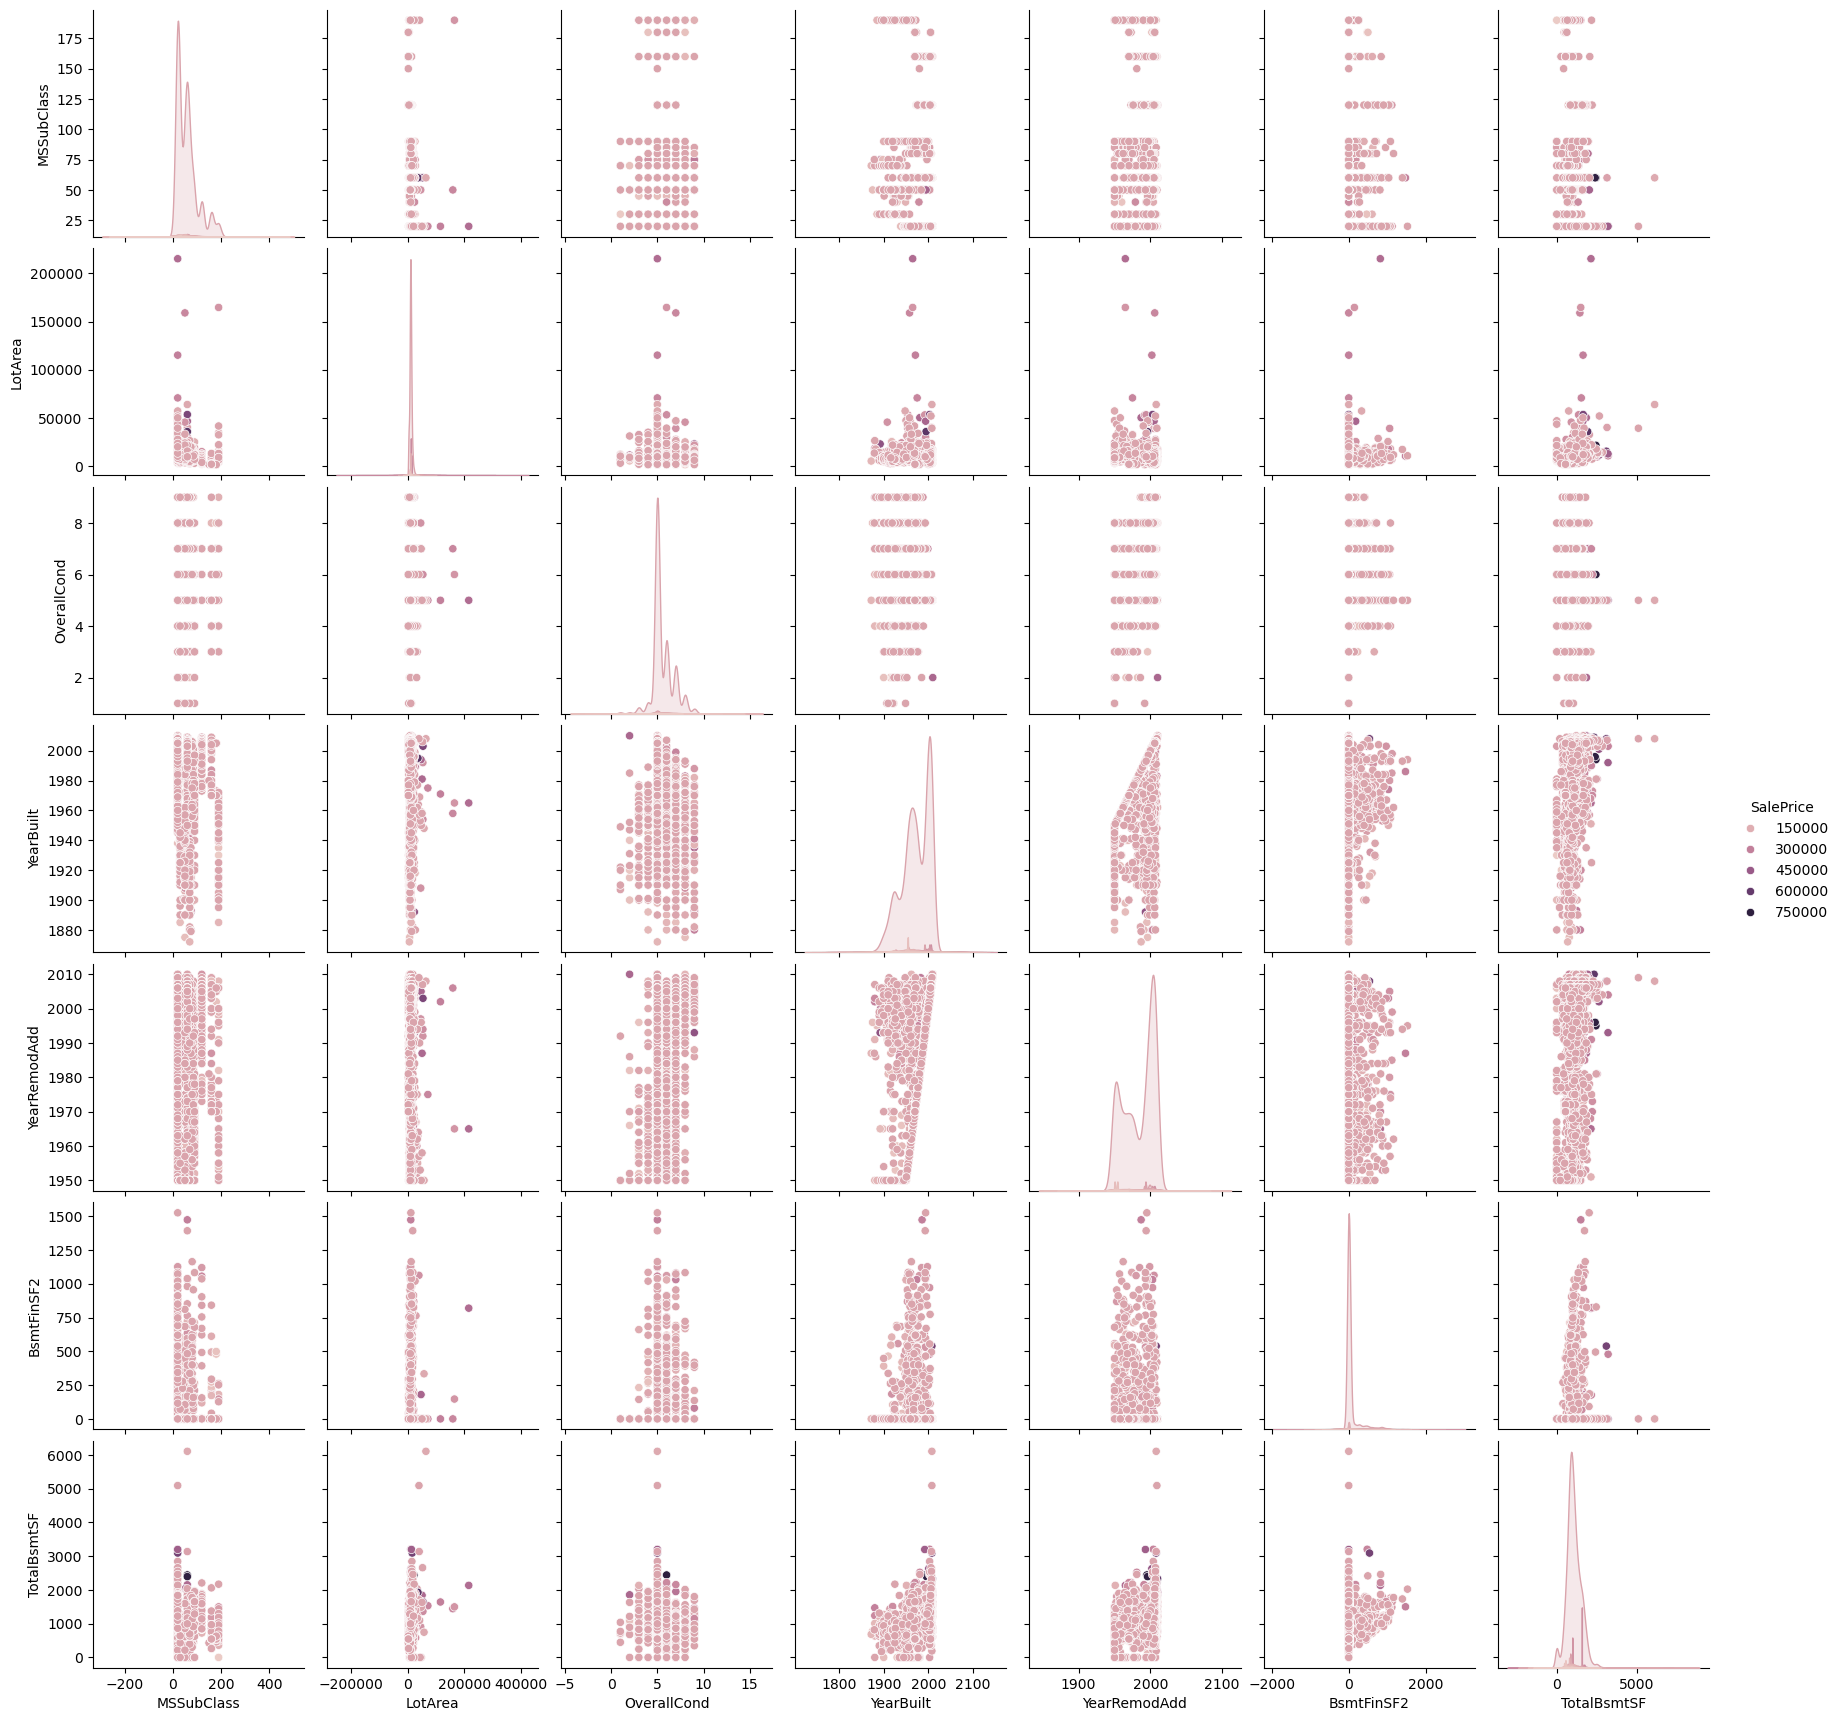

In [364]:
sn.pairplot(data=new,hue='SalePrice')

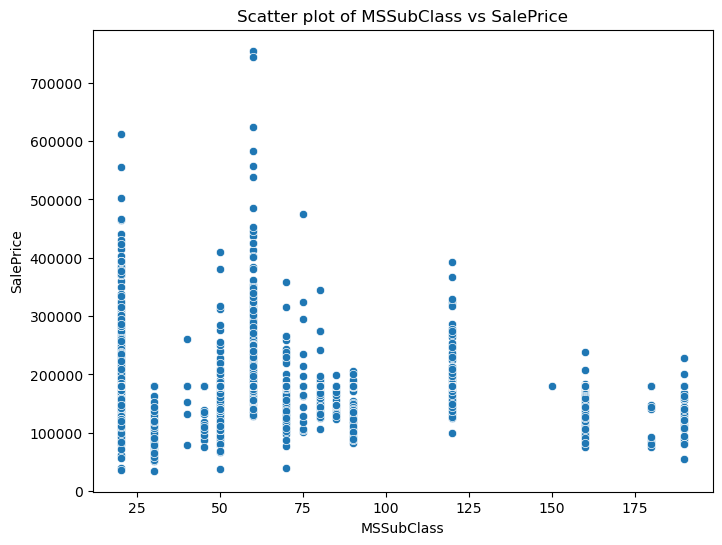

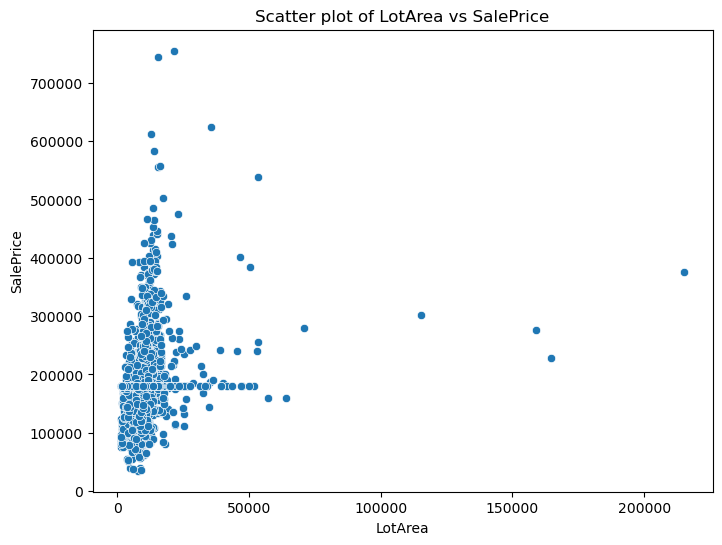

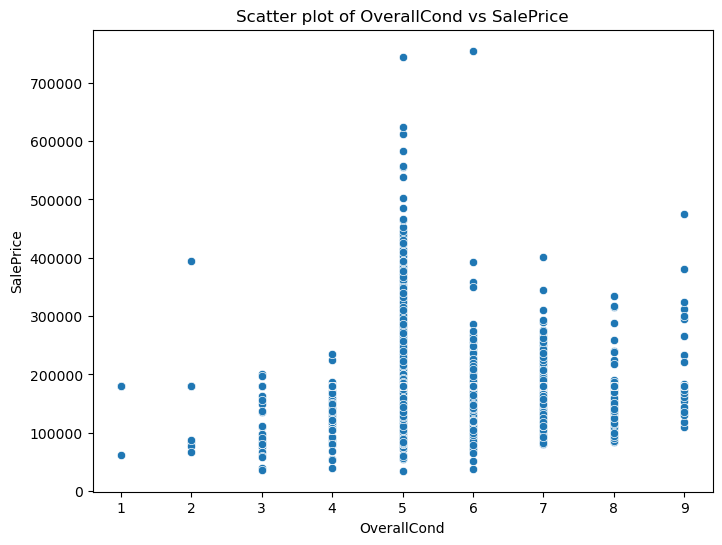

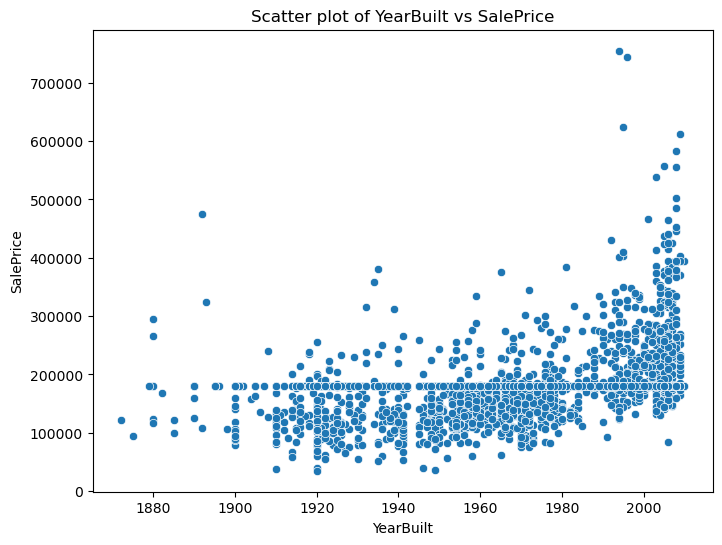

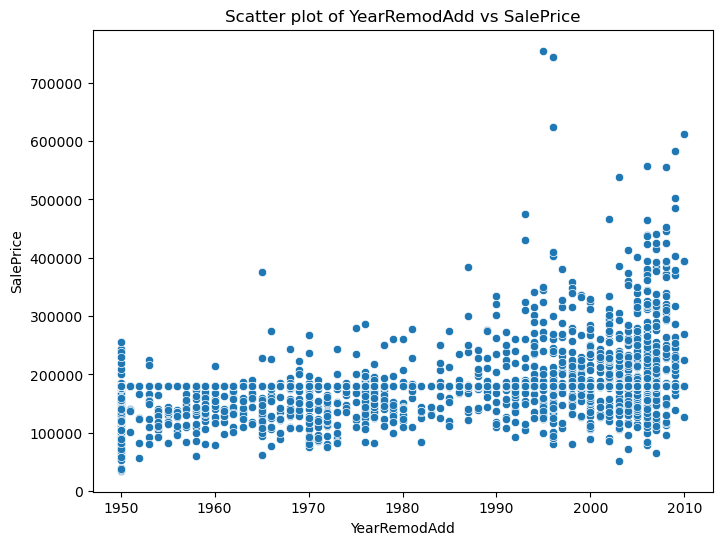

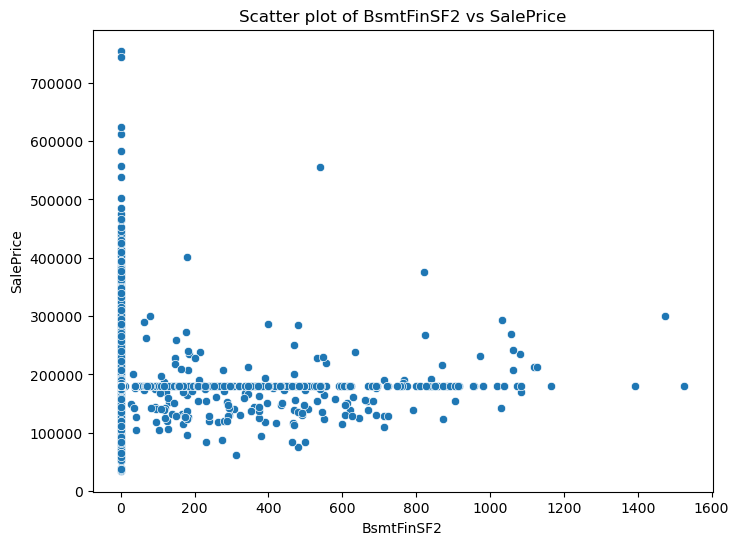

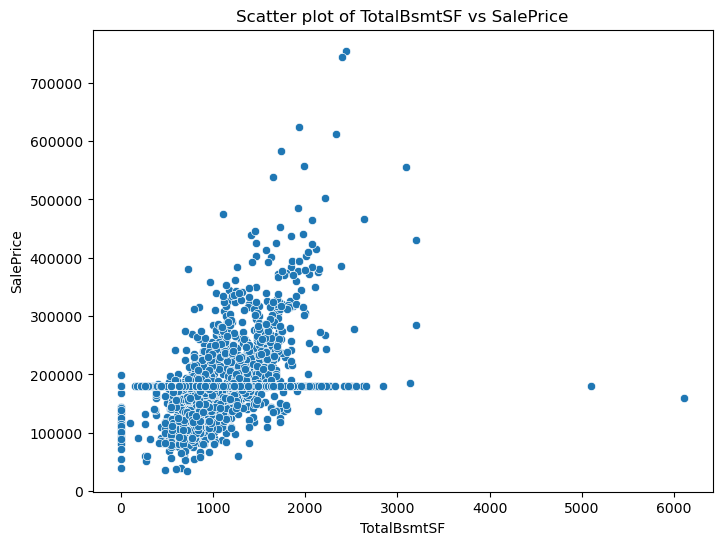

In [361]:
columns = ['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF']

# Create scatter plots for each column against 'SalePrice'
for column in columns:
    plt.figure(figsize=(8, 6))
    sn.scatterplot(x=new[column], y=new['SalePrice'])
    plt.xlabel(column)
    plt.ylabel('SalePrice')
    plt.title(f'Scatter plot of {column} vs SalePrice')
    plt.show()

In [366]:
from catboost import CatBoostRegressor

ModuleNotFoundError: No module named 'catboost'